In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal.windows as w

## Exercise 5.1: Visualization of the FFT Spectrum

In [2]:
N=32
sr = 5*10**6
A = 2
normalized_f = 0.14
angle = 0

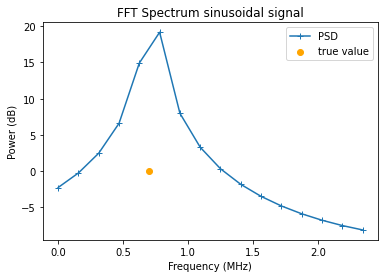

In [3]:
sin = (A* np.exp(2j*np.pi*normalized_f*np.arange(33) + 0*1j))
fft_sin = np.fft.fft(sin)


sr2 = 5 #*10**6
timestep = 1/(sr2)
freq = np.fft.fftfreq(N, d=timestep) 
idx = np.argsort(freq)


fft_sin_p = abs(fft_sin[idx][int(len(fft_sin)/2):])**2/N # power version 
fft_sin_db = 10*np.log10(fft_sin_p)


idx_max = np.argmax(fft_sin)
A_true = np.log10(A/2) #np.sqrt(2 * fft_sin[idx_max])
f_true = sr2*normalized_f

plt.figure()
plt.plot(freq[idx][int(len(fft_sin)/2):],fft_sin_db,marker='+',label='PSD')
plt.scatter(f_true,A_true,label='true value',c='orange')
plt.title('FFT Spectrum sinusoidal signal')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB)')
plt.legend()
plt.show()

When the true frequnecy is a multiple of 1/N we exactly hit the true value whereas for the other frequencies of FFT we have values around 0.

## Exercise 5.2: Visualization of the FFT Spectrum

No difference to Exercise 5.1!

## Homework 5.1: Visualization of the FFT Spectrum

In [4]:
N=128
sr = 2 * 10**6
sr2 = 2

Am   = [1.0, 0.5, 1e-4, 0.001]
psim = [0.1, 0.1+2.5/N, 0.17, 0.21]
phim = [0.0, 0.0, 2.0, 0.0]

In [5]:
big_signal = 0
f_coll = []
mag_coll = []
for i in range(4):
    sin_part = Am[i]* np.sin(2*np.pi*psim[i]*np.arange(128)/sr2 + phim[i])
    big_signal += sin_part
    f_MHz = sr2*psim[i]
    f_coll.append(f_MHz)
    
    

In [6]:
fft_sig =(np.fft.fft(big_signal)/N)**2
fft_sig_dB = 10*np.log10(fft_sig)
fft_sig_dB_normal = fft_sig_dB/Am[0]

/home/c/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


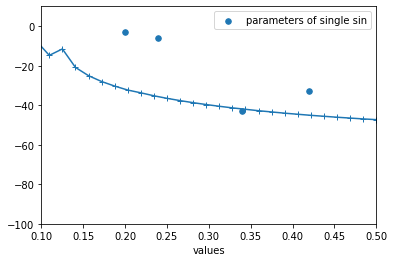

In [7]:
timestep = 1/(sr2)
freq = np.fft.fftfreq(int(N), d=timestep) # contain sample f
idx = np.argsort(freq)

plt.figure()
plt.plot(freq[idx],fft_sig_dB_normal[idx], label='',marker='+')
plt.scatter(f_coll, 10*np.log10(np.array(Am)/2), label='parameters of single sin',marker='.',s=122)

plt.title('')
plt.xlabel('values')
plt.ylabel('')

plt.xlim(0.1,0.5)
plt.ylim(-100,10)

plt.legend()
plt.show()

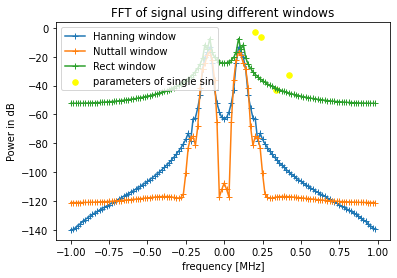

In [8]:
ham_wind = np.hanning(N) # window over all 128 samples 
nut_wind = w.nuttall(N)
rect_wind = 1

fft_sig_ham = (np.fft.fft(big_signal*ham_wind)/N)**2
fft_sig_dB_ham = 10*np.log10(fft_sig_ham)
fft_sig_dB_normal_ham = fft_sig_dB_ham/Am[0]

fft_sig_nut = (np.fft.fft(big_signal*nut_wind)/N)**2
fft_sig_dB_nut = 10*np.log10(fft_sig_nut)
fft_sig_dB_normal_nut = fft_sig_dB_nut/Am[0]

fft_sig_rect = (np.fft.fft(big_signal*rect_wind)/N)**2
fft_sig_dB_rect = 10*np.log10(fft_sig_rect)
fft_sig_dB_normal_rect = fft_sig_dB_rect/Am[0]


plt.figure()
plt.plot(freq[idx],fft_sig_dB_normal_ham[idx], label='Hanning window',marker='+')
plt.plot(freq[idx],fft_sig_dB_normal_nut[idx], label='Nuttall window',marker='+')
plt.plot(freq[idx],fft_sig_dB_normal_rect[idx], label='Rect window',marker='+')
plt.scatter(f_coll, 10*np.log10(np.array(Am)/2), label='parameters of single sin',marker='.',s=122,c='yellow')
plt.title('FFT of signal using different windows')
plt.xlabel('frequency [MHz]')
plt.ylabel('Power in dB')


plt.legend()
plt.show()

The narrower the window the wider frequency resolution and vice versa. When the window is infinitely long, i. e. considers whole signal (the longer the worse), we won't be able to see a lot at the frequency resolution because the more time passes the greater are the frequency spectra considered. This accounts especially for the rect window. However, when a window is bell shaped the samples further away from the signal center are ignored almostly. This gives us a better frequency resolution. So the peaks should be more visible for the Nuttall and Hanning window than for the rect window over the full signal.

FFT is only an estimation. We have a sampling rate which draws out single data points out of the signal. However, those do not build up the whole function, we can only estimate a function with them. Therefore, concrete continious values which would hit the true values are missing.

## Exercise 5.3: Calculate Polynomial Fit

In [9]:
def calc_polyfit_correction(spectrum_excerpt, df):
    """
    Parameters
    ----------
    spectrum_excerpt : list of three floats
        left, center and right magnitude value
    df : float
        frequency difference of two consecutive FFT-bins
    Returns
    -------
    offset_frequency: float
        Offset towards the location of Pc
    Pmax: magnitude at the maximum
    a: list of three floats
        Parameters of the polynomial.
    """
    pl = spectrum_excerpt[0]
    pc = spectrum_excerpt[1]
    pr = spectrum_excerpt[2]

    
    a0 = pc
    a1 = (pr-pl)/(2*df)
    a2 = (pl-2*pc+pr)/(2*df**2)
    a = [a0,a1,a2]

    Pmax = (-2*pr*(4*pc+pl)     + (pl-4*pc)**2      + pr**2      )/(16*pc     - 8*(pl+pr))
    
    offset_frequency = -(a1/(2*a2))
    
    return offset_frequency, Pmax, a

## Exercise 5.4: Test Polynomial Fit

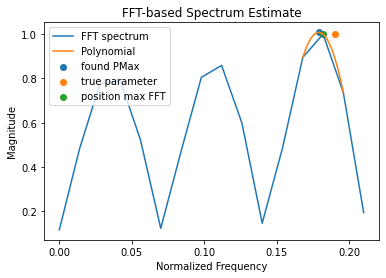

In [10]:
psi=0.19 # as normalized f
phi=0.85
A = 1
N = 32
Z=4*N 
sin_poly = np.array((A* np.sin(2*np.pi*psi*np.arange(N) + phi)).tolist() + [0]*Z)


fft_ = abs(np.fft.fft(sin_poly)[:N//2])
f_norm = np.linspace(0, 0.21, N//2)

idx_max = np.argmax(fft_)
f_max = f_norm[idx_max]
fft_max = fft_[idx_max]

center = f_norm[np.argmax(fft_)] 

df = f_norm[1]
spectrum_excerpt = abs(fft_[np.argmax(fft_)-1:np.argmax(fft_)+1+1])
off_f,pmax,a = calc_polyfit_correction(spectrum_excerpt, df)
df_ar = np.array([-df,0,df])
df_lin = np.linspace(-df,df,N//2)
polynomial = (a[0])+a[1]*df_lin+a[2]*df_lin**2

normal = max(fft_)
df_pos = df_lin+center


# Plot spectrum estimate
plt.plot(f_norm, fft_/normal, label='FFT spectrum')
plt.plot(df_lin+center, polynomial/normal, label='Polynomial')
plt.scatter(off_f+center,pmax/normal,label='found PMax')
plt.scatter(psi,A,label='true parameter')
plt.scatter(f_max,fft_max/normal,label='position max FFT')


plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.title('FFT-based Spectrum Estimate')
plt.legend()
plt.show()

## Homework 5.2: Phase estimate

In [11]:
def dft_sum_k(bin_k_freq, signal=sin_poly, freq=True):
    N = len(signal)
    
    if freq==False: # we use k-th bin 
        to_use = bin_k_freq/N
    else: # we inputted a frequency value
        to_use = bin_k_freq
        
    DFT_exp = np.exp(-2j*np.pi*np.arange(N)*to_use) # f_bin already normalized
    bin_val = np.sum(signal*DFT_exp)/N

    
    return bin_val

In [12]:
poly_f = off_f+center
bin_val_poly = dft_sum_k(bin_k_freq=poly_f, signal=sin_poly, freq=True)
poly_angle = np.angle(bin_val_poly)

In [13]:
bin_true = dft_sum_k(bin_k_freq=psi, signal=sin_poly, freq=True)
true_angle = np.angle(bin_true)

In [14]:
bin_argmax = dft_sum_k(bin_k_freq=f_max, signal=sin_poly, freq=True)
argmax_angle = np.angle(bin_argmax)

In [15]:
fft_angles = np.angle(np.fft.fft(sin_poly)[:N//2])

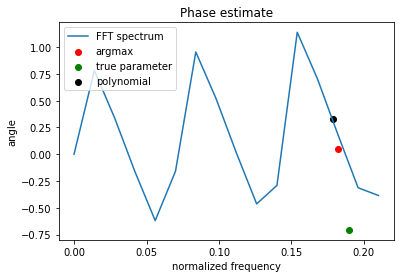

In [16]:
plt.plot(f_norm,fft_angles, label='FFT spectrum')
plt.scatter(f_max,argmax_angle,label='argmax',c='red')
plt.scatter(psi,true_angle,label='true parameter',c='green')
plt.scatter(poly_f,poly_angle,label='polynomial',c='black')

plt.ylabel('angle')
plt.xlabel('normalized frequency')
plt.title('Phase estimate')
plt.legend()
plt.show()

## Homework 5.3: RMSE of Argmax, and Polyfit

In [17]:
np.random.seed(0)
N = 32
A = 1
psi = 0.21
phi = 0
ranged = np.arange(N)

sif =  A * np.cos(2 * np.pi * psi * ranged + phi) + 1j * A * np.sin(2 * np.pi * psi * ranged + phi)
Z_list = [1,2,4,8,16,32,64]

In [18]:
np.random.seed(1000)

timestep = 1/(psi)
freq = np.fft.fftfreq(int(N), d=timestep) # contain sample f
idx = np.argsort(freq)

true_y = psi # peak of cosine frequency domain at f0/normalized freq

SNR_coll = []
M = 1000

SNR_space = np.linspace(-20,40,int((20+40)/2)).round(0).astype('int') # assuming dB
var_list = A**2/(SNR_space*2)
Z_RMSE_coll_argmax, Z_RMSE_coll_poly = [],[]
for Zf in Z_list:
    RMSE_coll_argmax = []
    RMSE_coll_poly = []
    for single_var in var_list:

        std = np.sqrt(single_var)
        rmse_sum_argmax, rmse_sum_poly = 0, 0
        for m in range(M):

            noise = std*np.random.randn(N, 2).view(np.complex128).flatten()
            noised_sif = sif + noise    
            noised_sif_pad = np.append(noised_sif, np.zeros(abs(N-N*Zf)))
            pad_fft = np.fft.fft(noised_sif_pad) 

            # method argmax:
            y_est_ind = np.argmax(pad_fft[idx])
            y_est_argmax = freq[idx][y_est_ind]

            # method polyfit:
            poly_fft = np.polyfit(freq[idx],pad_fft[idx],2)
            y_est_ind_poly = np.argmax(poly_fft)
            y_est_poly = freq[idx][y_est_ind_poly]

            rmse_sum_argmax += (y_est_argmax-true_y)**2
            rmse_sum_poly += (y_est_poly-true_y)**2

        RMSE_coll_argmax.append(np.sqrt(rmse_sum_argmax/M)) 
        RMSE_coll_poly.append(np.sqrt(rmse_sum_poly/M)) 
        
    Z_RMSE_coll_argmax.append(RMSE_coll_argmax)
    Z_RMSE_coll_poly.append(RMSE_coll_poly)


/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


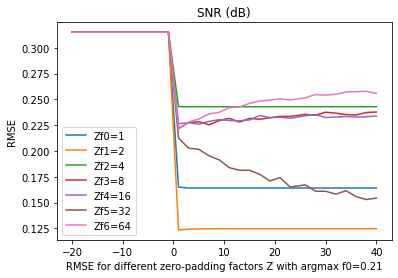

In [19]:
for i in range(len(Z_RMSE_coll_argmax)):
    plt.plot(SNR_space, Z_RMSE_coll_argmax[i], label=f'Zf{i}={Z_list[i]}')

plt.xlabel('RMSE for different zero-padding factors Z with argmax f0=0.21')
plt.ylabel('RMSE')
plt.title('SNR (dB)')
plt.legend()
plt.show()

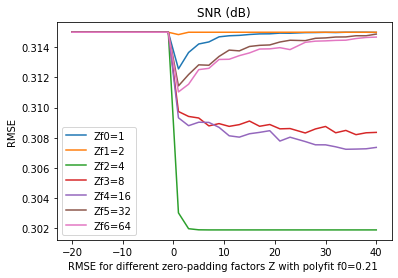

In [20]:
for i in range(len(Z_RMSE_coll_argmax)):
    plt.plot(SNR_space, Z_RMSE_coll_poly[i], label=f'Zf{i}={Z_list[i]}')

plt.xlabel('RMSE for different zero-padding factors Z with polyfit f0=0.21 ')
plt.ylabel('RMSE')
plt.title('SNR (dB)')
plt.legend()
plt.show()

## Homework 5.4: RMSE of Argmax, and Polyfit, cntd.

Polyfit builds up a polynomial, here parabola, fitting best to the underlying FFT. It is a smooth function considering all points. When we already have through zeropadding the optimal number of points we don't need more to get an even better estimation because so or so the points theoretically should already all lay on the built polynomial. In contrast, Argmax doesn't build a function fitting the FFT. It only looks at single points. Then it chooses the one with the highest amount. When we get more points through zeropadding it has a higher selection and therefore increased probability that the real max is among them.

The second question is almost answered by my first answer. The Polyfit builds a parabola. When only few additional points come in resolution through zero-padding into play it doesn't change a lot. For more fine-fitting more additional points would be needed.

Z only increases the frequency resolution. When the FFT as estimator is already good (comes close to the real peak) we don't need zero-padding. The number of added points trough zero-padding don't have to be crucial as long as there is a point very close to the real peak included. Especially, with high SNR meaning that the noise is not that distrubing of the signal, the FFT should be a better estimation. Therefore, zero-padding wouldn't be needed that urgent.

With increasing psi the sample frequency would go down. So we would get a worse estimatation of the original signal. Therefore, calculating a FFT out of a worse signal estimation gives us a worse estimation. Therefore, the Argmax estimation can't be that good as for a signal for which we have a better estimation. It follows, that the RMSE would also score lower.